In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
startup = pd.read_csv('50_Startups.csv')

In [3]:
startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
startup.shape

(50, 5)

In [5]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
startup.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [7]:
startup=startup.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
startup.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Assumption Check

#### Linearity Check

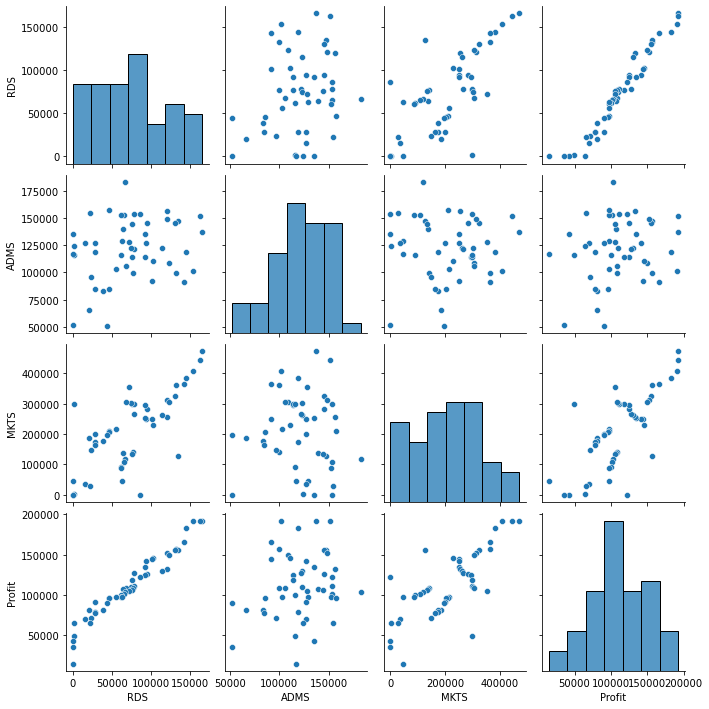

In [8]:
sns.pairplot(startup)

#### Normality Test

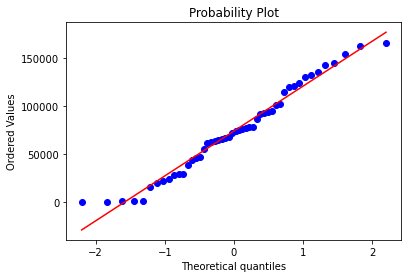

In [9]:

stats.probplot(x = startup['RDS'],dist='norm',plot=plt)
plt.show()

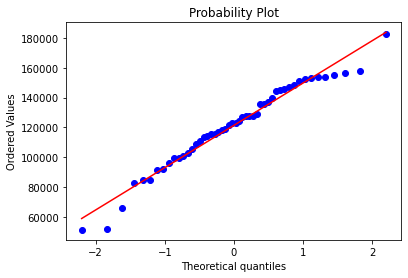

In [10]:
stats.probplot(x = startup['ADMS'],dist='norm',plot=plt)
plt.show()

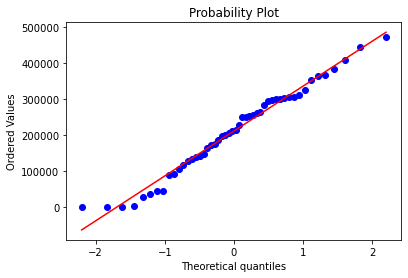

In [11]:
stats.probplot(x = startup['MKTS'],dist='norm',plot=plt)
plt.show()

#### Correlation Analysis

In [12]:
corr_matrix = startup.corr().round(2)

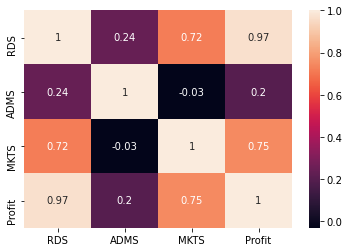

In [13]:
sns.heatmap(data = corr_matrix,annot=True)
plt.show()

#### No Auto Regression - Passed

### Modil Building

In [14]:
import statsmodels.formula.api as smf
linear_model = smf.ols('Profit~RDS+ADMS+MKTS',data = startup).fit()

In [15]:
linear_model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [16]:
round(linear_model.pvalues,5) #ADMS and MKTS insignificant

Intercept    0.00000
RDS          0.00000
ADMS         0.60176
MKTS         0.10472
dtype: float64

In [17]:
print('R2 score : ',round(linear_model.rsquared,4))
print('Adjusted R2 score: ',round(linear_model.rsquared_adj,4)) #94% accuracy

R2 score :  0.9507
Adjusted R2 score:  0.9475


In [18]:
#Build SLR and MLR models for insignificant variables ADMS and MKTS

In [19]:
linear_model_1 = smf.ols('Profit~ADMS',data = startup).fit()

In [20]:
round(linear_model_1.pvalues,5) #ADMS insignificant

Intercept    0.00382
ADMS         0.16222
dtype: float64

In [21]:
lin_model_2 = smf.ols('Profit ~ MKTS',data = startup).fit()

In [22]:
print('R2 score : ',lin_model_2.rsquared)
print('Adjusted R2 score: ',lin_model_2.rsquared_adj)
print('AIC value         : ',round(lin_model_2.aic,4))
print('BIC value         : ',round(lin_model_2.bic,4))

R2 score :  0.5591535746115515
Adjusted R2 score:  0.5499692740826254
AIC value         :  1164.3568
BIC value         :  1168.1808


In [23]:
np.round(lin_model_2.pvalues,5)#significant

Intercept    0.0
MKTS         0.0
dtype: float64

In [24]:
lin_model_3 = smf.ols('Profit ~MKTS + ADMS',data = startup).fit()
print('R2 score : ',lin_model_3.rsquared)
print('Adjusted R2 score: ',lin_model_3.rsquared_adj)
print('AIC value         : ',round(lin_model_3.aic,4))
print('BIC value         : ',round(lin_model_3.bic,4))

R2 score :  0.6097229746770663
Adjusted R2 score:  0.593115441684601
AIC value         :  1160.2648
BIC value         :  1166.0009


In [25]:
np.round(lin_model_3.pvalues,5) #significant

Intercept    0.25893
MKTS         0.00000
ADMS         0.01729
dtype: float64

### Model Validation Techniques

#### Collinearity Check|Residual Analysis

### Cooks Distance

In [28]:
rsq_r=smf.ols("RDS~ADMS+MKTS",data=startup).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=startup).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=startup).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


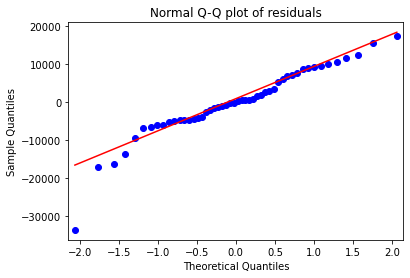

In [29]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
import statsmodels.api as sm

sm.qqplot(linear_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(linear_model.resid<-30000))

[array([49], dtype=int64)]

### Residual Plot for Homoscadasticity

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

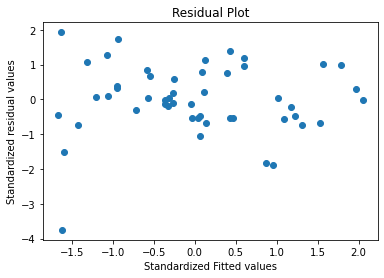

In [33]:
plt.scatter(get_standardized_values(linear_model.fittedvalues),
            get_standardized_values(linear_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Model deletion Diagnosis

#### Cooks Distance

In [34]:
model_influence = linear_model.get_influence()
(c, _) = model_influence.cooks_distance

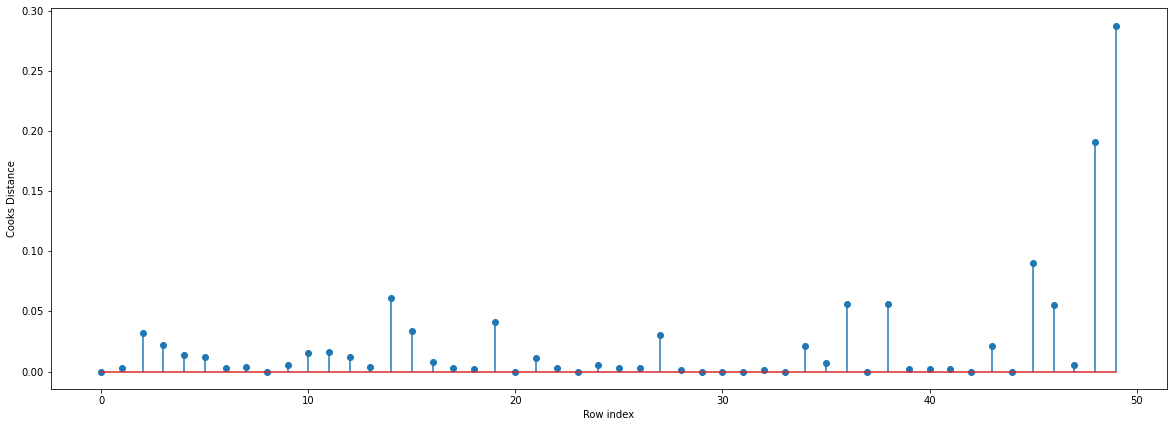

In [35]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [36]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

### High Influence Points

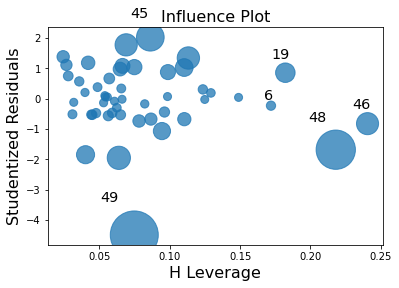

In [38]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(linear_model)
plt.show()

In [39]:
startup[startup.index.isin([49])] 

,RDS,ADMS,MKTS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [41]:
startup_new = startup.copy()

In [43]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup_new=startup_new.drop(startup_new.index[[49]],axis=0).reset_index()

In [45]:
startup_new = startup_new.drop(['index'],axis=1)

In [46]:
startup_new

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### Build Model

In [50]:
final_model = smf.ols('Profit~RDS+ADMS+MKTS',data = startup_new).fit()
(final_model.rsquared_adj,final_model.aic)

(0.9587373264138503, 1020.5652974526367)

### Data Predicting

In [51]:
pred_y = final_model.predict(startup_new)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64